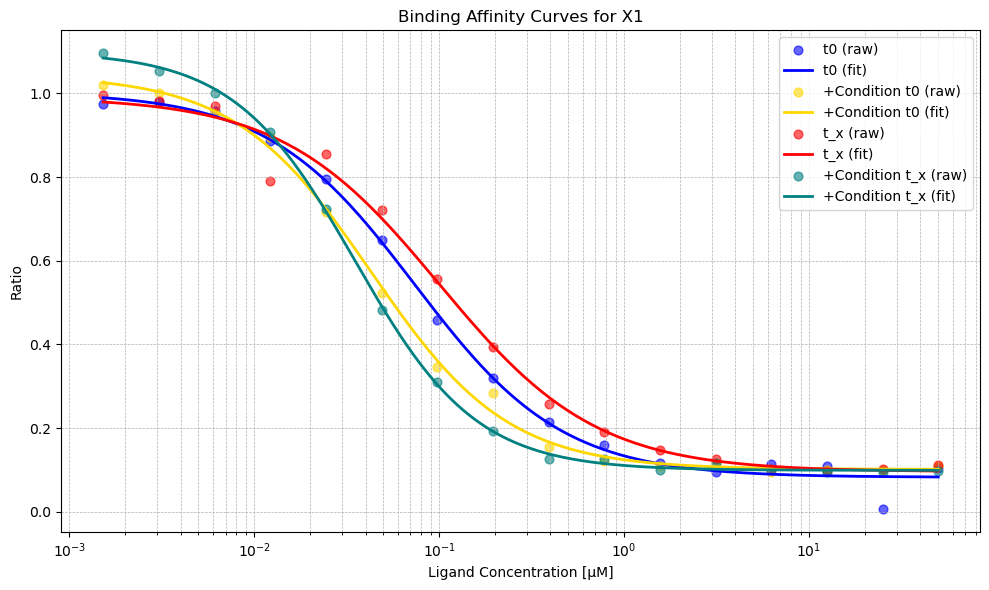

Saved binding_affinity_X1.pdf


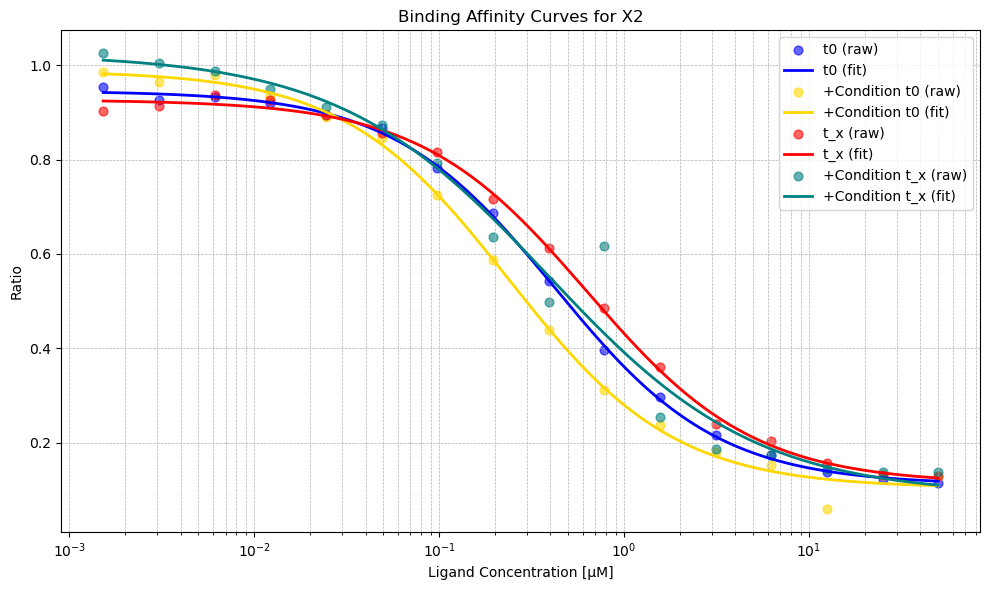

Saved binding_affinity_X2.pdf


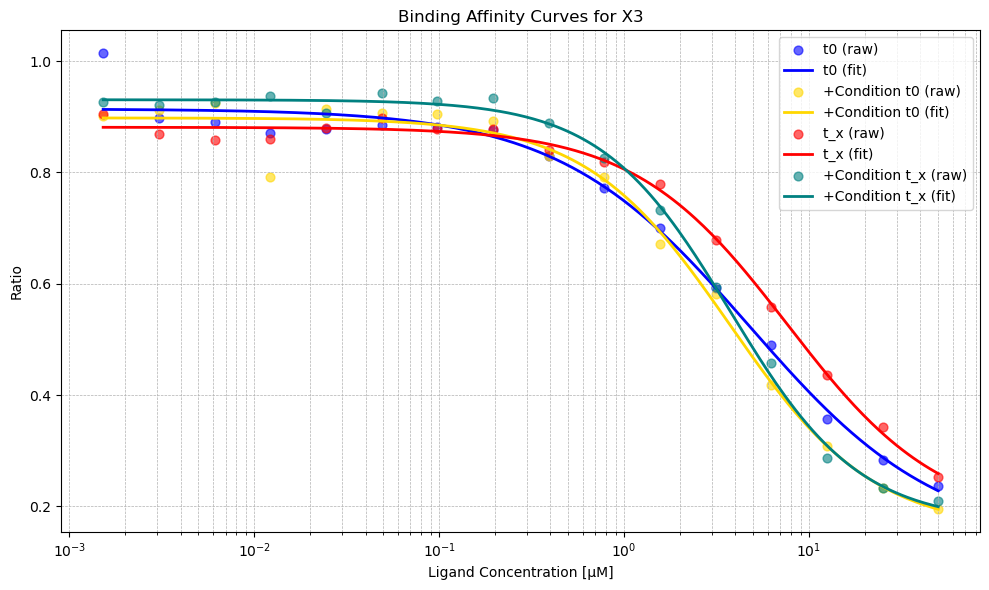

Saved binding_affinity_X3.pdf


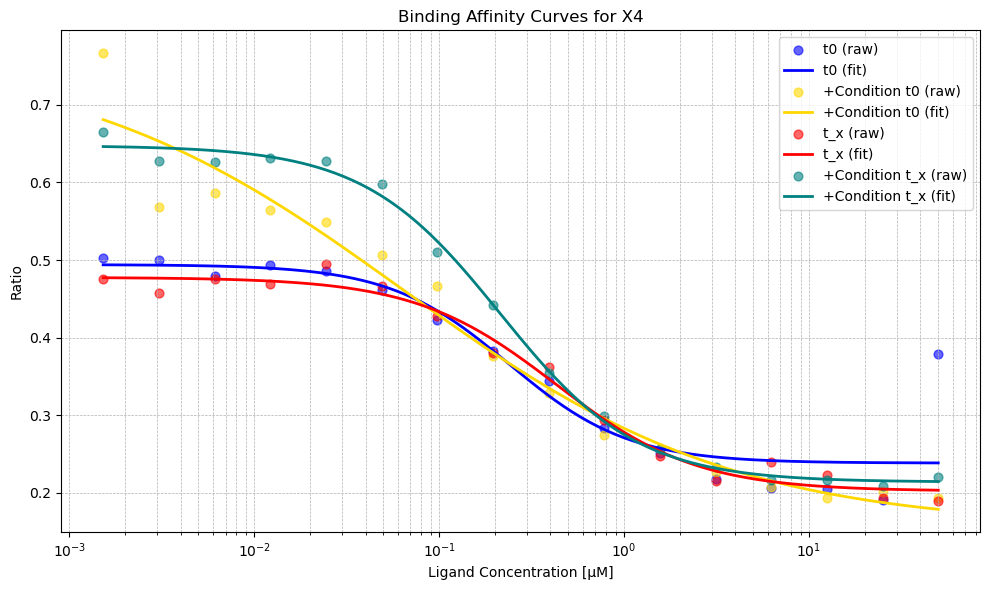

Saved binding_affinity_X4.pdf


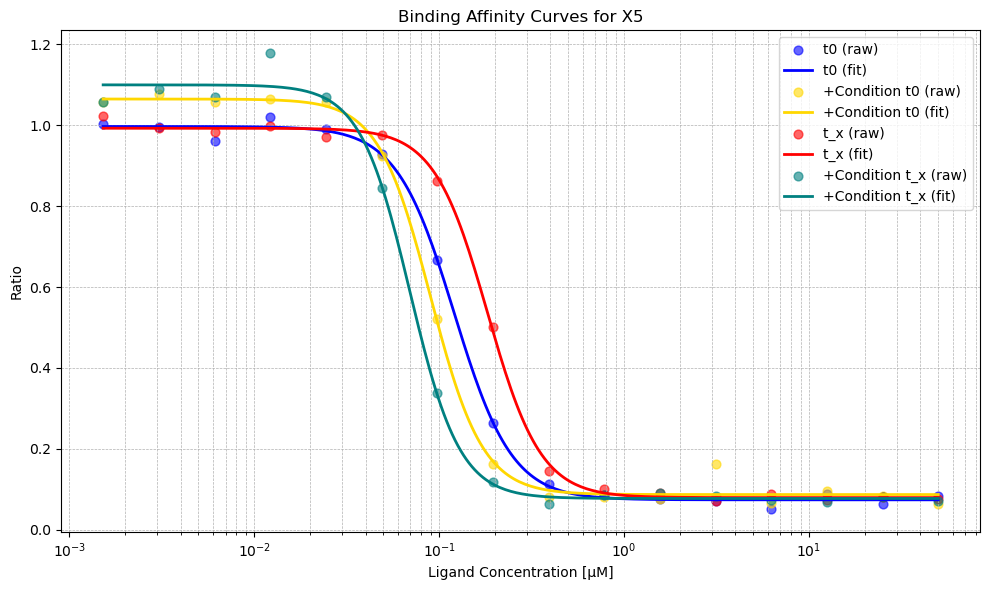

Saved binding_affinity_X5.pdf


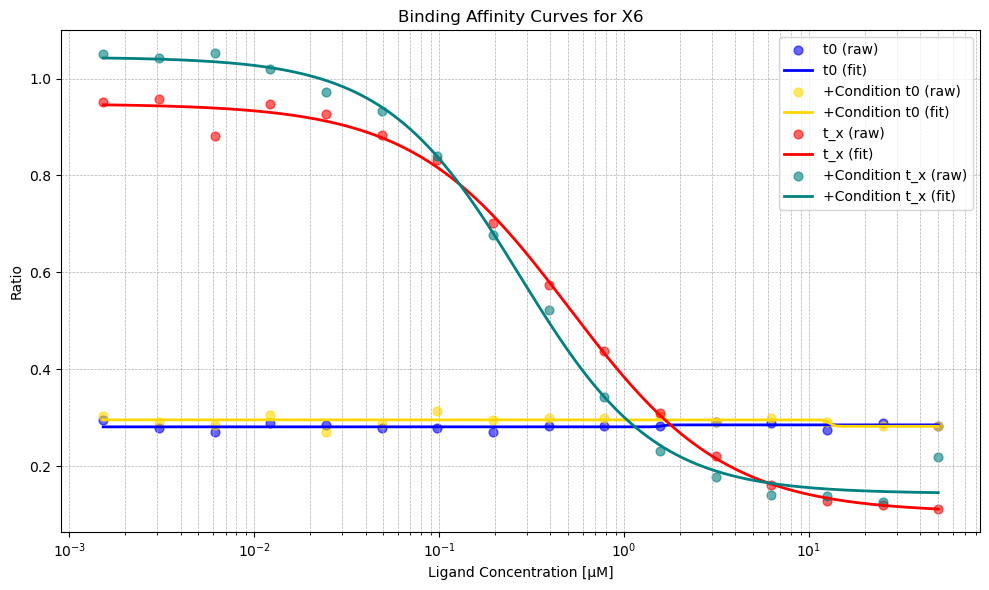

Saved binding_affinity_X6.pdf


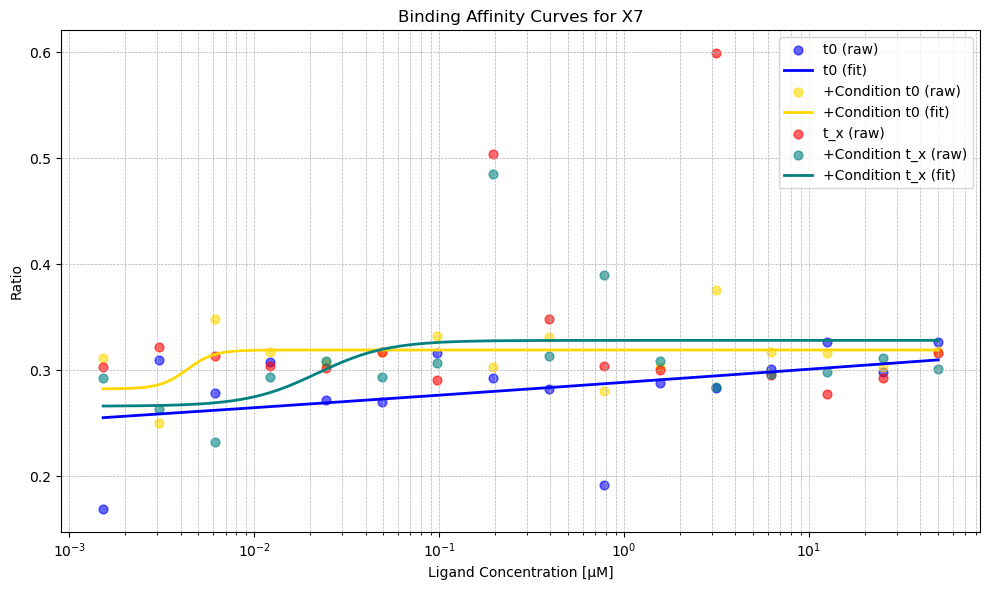

Saved binding_affinity_X7.pdf
Generated PDFs for X1–X7.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fit_file = "logistic_fit_results.csv"
compounds = [f"X{i}" for i in range(1, 8)]

conditions_order = ["t0", "+Condition t0", "t_x", "+Condition t_x"]

colors = {
    "t0": "blue",
    "+Condition t0": "gold",
    "t_x": "red",
    "+Condition t_x": "teal",
}

def four_param_logistic(conc, A, B, C, D):
    return D + (A - D) / (1 + (conc / C) ** B)

df_fit_all = pd.read_csv(fit_file)

for compound in compounds:
    raw_file = f"synth_{compound}.csv"
    df_raw = pd.read_csv(raw_file)

    df_fit = df_fit_all[
        (df_fit_all["compound"] == compound) &
        (df_fit_all["EC50 (C, µM)"].notna())
    ].copy()

    plt.figure(figsize=(10, 6))

    for condition in conditions_order:
        sub_raw = df_raw[df_raw["Condition"] == condition].copy()
        if sub_raw.empty:
            continue

        plt.scatter(
            sub_raw["X"], sub_raw["Y"],
            color=colors.get(condition, "gray"),
            label=f"{condition} (raw)",
            alpha=0.6, s=40
        )

        sub_fit = df_fit[df_fit["condition"] == condition]
        if sub_fit.empty:
            continue

        A = float(sub_fit["Top (A)"].iloc[0])
        B = float(sub_fit["Slope (B)"].iloc[0])
        C = float(sub_fit["EC50 (C, µM)"].iloc[0])
        D = float(sub_fit["Bottom (D)"].iloc[0])

        x_min = max(sub_raw["X"].min(), 1e-6)
        x_max = sub_raw["X"].max()
        x_fit = np.logspace(np.log10(x_min), np.log10(x_max), 300)
        y_fit = four_param_logistic(x_fit, A, B, C, D)

        plt.plot(
            x_fit, y_fit,
            color=colors.get(condition, "gray"),
            label=f"{condition} (fit)",
            linewidth=2
        )

    plt.xscale("log")
    plt.xlabel("Ligand Concentration [µM]")
    plt.ylabel("Ratio")
    plt.title(f"Binding Affinity Curves for {compound}")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    out_pdf = f"binding_affinity_{compound}.pdf"
    plt.savefig(out_pdf, format="pdf", bbox_inches="tight")
    plt.show()
    plt.close()

    print(f"Saved {out_pdf}")

print("Generated PDFs for X1–X7.")